In [2]:
import gymnasium as gym
import miniworld
from matplotlib import pyplot as plt

miniworld_env_ids = [env_id for env_id in gym.registry if "MiniWorld" in env_id]

In [3]:
print(miniworld_env_ids)

['MiniWorld-CollectHealth-v0', 'MiniWorld-FourRooms-v0', 'MiniWorld-Hallway-v0', 'MiniWorld-Maze-v0', 'MiniWorld-MazeS2-v0', 'MiniWorld-MazeS3-v0', 'MiniWorld-MazeS3Fast-v0', 'MiniWorld-OneRoom-v0', 'MiniWorld-OneRoomS6-v0', 'MiniWorld-OneRoomS6Fast-v0', 'MiniWorld-PickupObjects-v0', 'MiniWorld-PutNext-v0', 'MiniWorld-RoomObjects-v0', 'MiniWorld-Sidewalk-v0', 'MiniWorld-Sign-v0', 'MiniWorld-TMaze-v0', 'MiniWorld-TMazeLeft-v0', 'MiniWorld-TMazeRight-v0', 'MiniWorld-ThreeRooms-v0', 'MiniWorld-WallGap-v0', 'MiniWorld-YMaze-v0', 'MiniWorld-YMazeLeft-v0', 'MiniWorld-YMazeRight-v0']


In [4]:
def make_env():
    env = gym.make("MiniWorld-Maze-v0")
    return env

In [5]:
"""
The observation space is an `ndarray` with shape `(obs_height, obs_width, 3)`
representing an RGB image of what the agents see.
"""

"""
class Actions(IntEnum):
      # Turn left or right by a small amount
      turn_left = 0
      turn_right = 1

      # Move forward or back by a small amount
      move_forward = 2
      move_back = 3

      # Pick up or drop an object being carried
      pickup = 4
      drop = 5

      # Toggle/activate an object
      toggle = 6

      # Done completing task
      done = 7
"""

env = make_env()

Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer


Discrete(3)
Box(0, 255, (60, 80, 3), uint8)
{'render.modes': ['human', 'rgb_array'], 'video.frames_per_second': 30, 'render_modes': ['human', 'rgb_array'], 'render_fps': 30}
this is obv
[[[ 86  62  51]
  [ 86  69  59]
  [ 84  66  57]
  ...
  [105 105 105]
  [105 105 106]
  [106 106 106]]

 [[ 85  62  52]
  [ 83  64  54]
  [ 80  62  53]
  ...
  [104 104 105]
  [105 105 105]
  [105 105 106]]

 [[ 78  62  53]
  [ 83  69  60]
  [ 84  70  61]
  ...
  [105 105 105]
  [105 105 106]
  [105 105 105]]

 ...

 [[ 82  63  55]
  [ 87  72  64]
  [ 87  71  62]
  ...
  [144 142 138]
  [100  99  95]
  [ 54  53  51]]

 [[ 83  61  52]
  [ 83  58  49]
  [ 84  58  49]
  ...
  [219 216 211]
  [219 217 210]
  [206 204 198]]

 [[ 83  59  50]
  [ 83  62  52]
  [ 84  64  55]
  ...
  [142 141 137]
  [197 195 190]
  [219 217 211]]]
{}
0.0
25.75
0.0
25.75


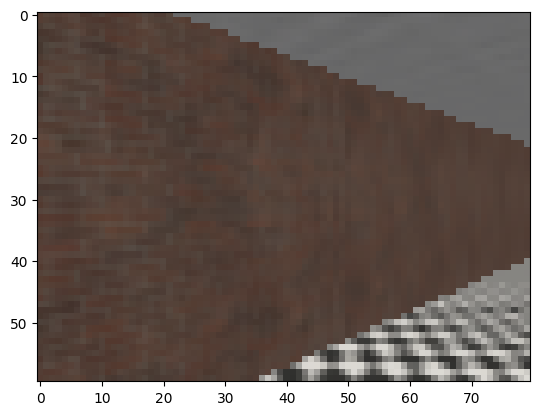

In [6]:
print(env.action_space)
print(env.observation_space)
print(env.metadata)
obs, info = env.reset()
print("this is obv")
print(obs)
print(info)

print(env.get_wrapper_attr('min_x'))
print(env.get_wrapper_attr('max_x'))
print(env.get_wrapper_attr('min_z'))
print(env.get_wrapper_attr('max_z'))
plt.imshow(obs)

[23.59882239  0.         13.59945935]
-0.9569710593840337


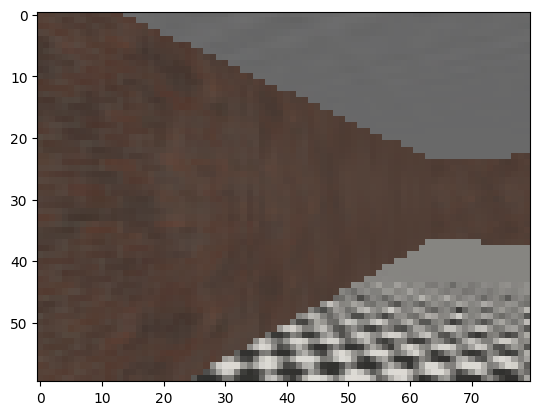

In [7]:
# Turn left or right by a small amount
turn_left = 0
turn_right = 1

# Move forward or back by a small amount
move_forward = 2
move_back = 3

# Pick up or drop an object being carried
pickup = 4
drop = 5

# Toggle/activate an object
toggle = 6

# Done completing task
done = 7

obs, reward, terminated, truncated, info = env.step(1)
print(env.get_wrapper_attr('agent').pos)
print(env.get_wrapper_attr('agent').dir)
plt.imshow(obs)


In [8]:
import gymnasium as gym
from vectorhash import build_vectorhash_architecture
from shifts import RatShift
from smoothing import RatSLAMSmoothing, IdentitySmoothing
import miniworld
from miniworld.params import DEFAULT_PARAMS
from miniworld_agent import MiniworldVectorhashAgent
import math
import torch

### vhash
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    
shapes = [(3, 3, 4), (4, 4, 5)]


def make_env():
    params = DEFAULT_PARAMS.copy().no_random()
    env = gym.make("MiniWorld-Maze-v0", max_episode_steps=-1, params=params, domain_rand=False)
    min_x = env.get_wrapper_attr("min_x")
    max_x = env.get_wrapper_attr("max_x")
    min_z = env.get_wrapper_attr("min_z")
    max_z = env.get_wrapper_attr("max_z")

    limits = torch.tensor([max_x - min_x, max_z - min_z, 2 * math.pi]).float()
    return env, limits


env, limits = make_env()
model = build_vectorhash_architecture(
    shapes,
    N_h=600,
    input_size=128,
    initalization_method="by_sparsity",
    limits=limits,
    device=device,
    shift=RatShift(),
    smoothing=RatSLAMSmoothing(device=device),
)


#### agent
agent = MiniworldVectorhashAgent(model, env)

Falling back to num_samples=4
Falling back to non-multisampled frame buffer
Falling back to num_samples=4
Falling back to non-multisampled frame buffer
by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  600


/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/hippocampal_sensory_layers.py:110: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggere

info for each h directly after learning it


/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/venv/lib/python3.9/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


h max, min, mean tensor(5.7731, device='mps:0') tensor(0., device='mps:0') tensor(1.8916, device='mps:0')
h_from_s max, min, mean tensor(5.7717, device='mps:0') tensor(0., device='mps:0') tensor(1.8911, device='mps:0')
h_from_s_denoised max, min, mean tensor(2.2915, device='mps:0') tensor(1.0921, device='mps:0') tensor(1.7193, device='mps:0')
avg nonzero/greaterzero h from book: tensor(551, device='mps:0') tensor(551, device='mps:0')
avg nonzero/greaterzero h from s: tensor(551, device='mps:0') tensor(551, device='mps:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='mps:0') tensor(600, device='mps:0')


/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:102: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s),


mse/cosinesimilarity h from book and h from s tensor(2.7841e-07, device='mps:0') tensor([1.], device='mps:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.4691, device='mps:0') tensor([0.8462], device='mps:0')
mse/cosinesimilarity s and s from h from s tensor(7.6402e-10, device='mps:0') tensor([1.], device='mps:0')
mse/cosinesimilarity s and s from h from s denoised tensor(0.0055, device='mps:0') tensor([1.0000], device='mps:0')
mse/cosinesimilarity s and s from h tensor(5.7036e-10, device='mps:0') tensor([1.], device='mps:0')


/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:109: UserWarning: Using a target size (torch.Size([1, 600])) that is different to the input size (torch.Size([600])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(h, h_from_s_denoised),
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:125: UserWarning: Using a target size (torch.Size([1, 128])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functional.mse_loss(s, s_from_h_from_s),
/Users/awalnoorsinghbajaj/Desktop/rl-research/vectorhash/vectorhash.py:132: UserWarning: Using a target size (torch.Size([1, 128])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.nn.functio

In [9]:
print(limits)

tensor([25.7500, 25.7500,  6.2832])


In [10]:
path = [0] * 18 + [3] * 10

In [11]:
import torch
from agent import path_test

results = path_test(agent, path, limits=torch.tensor([1, 1, 2 * math.pi / 8]))

info for each h directly after learning it
h max, min, mean tensor(5.7731, device='mps:0') tensor(0., device='mps:0') tensor(1.8916, device='mps:0')
h_from_s max, min, mean tensor(5.7714, device='mps:0') tensor(0., device='mps:0') tensor(1.8910, device='mps:0')
h_from_s_denoised max, min, mean tensor(2.2915, device='mps:0') tensor(1.0921, device='mps:0') tensor(1.7193, device='mps:0')
avg nonzero/greaterzero h from book: tensor(551, device='mps:0') tensor(551, device='mps:0')
avg nonzero/greaterzero h from s: tensor(551, device='mps:0') tensor(551, device='mps:0')
avg nonzero/greaterzero h from s denoised: tensor(600, device='mps:0') tensor(600, device='mps:0')
mse/cosinesimilarity h from book and h from s tensor(4.2575e-07, device='mps:0') tensor([1.], device='mps:0')
mse/cosinesimilarity h from book and h from s denoised tensor(1.4691, device='mps:0') tensor([0.8462], device='mps:0')
mse/cosinesimilarity s and s from h from s tensor(1.2778e-10, device='mps:0') tensor([1.], device='mp

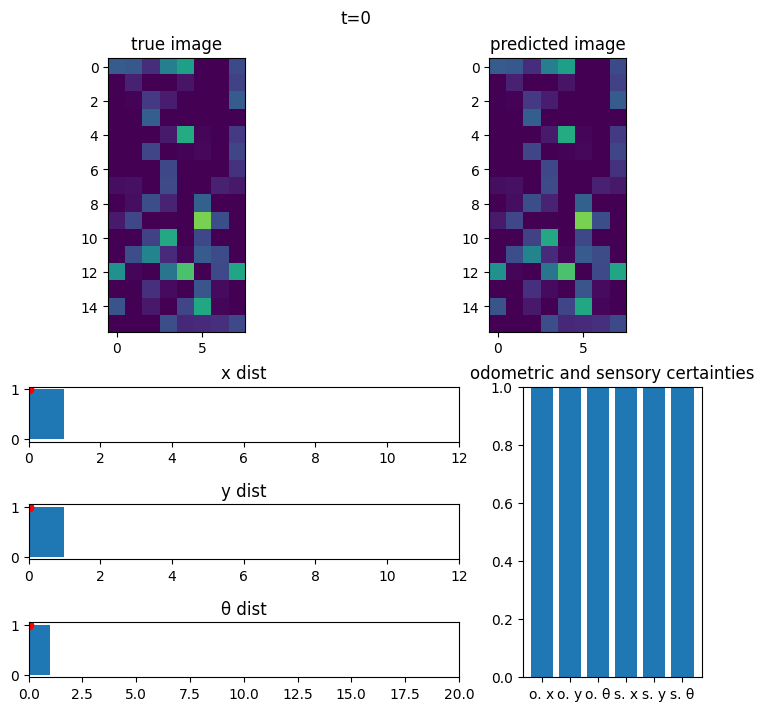

In [12]:
history = results[1]
ani = history.make_image_video()

In [13]:
ani.save("gifs/testpath6.gif", progress_callback=lambda current, total: print(f"frame {current}/{total}"), dpi=150)

MovieWriter ffmpeg unavailable; using Pillow instead.


frame 0/28
frame 1/28
frame 2/28
frame 3/28
frame 4/28
frame 5/28
frame 6/28
frame 7/28
frame 8/28
frame 9/28
frame 10/28
frame 11/28
frame 12/28
frame 13/28
frame 14/28
frame 15/28
frame 16/28
frame 17/28
frame 18/28
frame 19/28
frame 20/28
frame 21/28
frame 22/28
frame 23/28
frame 24/28
frame 25/28
frame 26/28
frame 27/28


: 